# 4. Prematuros
- Dataset: embarazo.csv

Cuando se espera un hijo, en EEUU es común escuchar que los primeros hijos suelen nacer tarde, pero también se escucha lo contrario, que tienden a nacer temprano. 

Este examen busca resolver este debate utilizando un conjunto de datos del National Survey of Family Growth, administrado por el CDC.

## consignas

1. Creación de Variables para el Análisis: Utiliza el conjunto de datos para crear una columna que represente la duración real del embarazo en semanas.

2. ¿Cual idea es la correcta? madres primerizas tienen el hijo mas tarde o por el contrario?

3. ¿Hay una diferencia estadísticamente significativa en la duración promedio de los embarazos entre madres primerizas y madres con más hijos?
    * Realiza una prueba t de dos muestras para comparar las medias. El test a continuacion. Para ejecutarlo hay que aislar la variable estudiada segun los dos grupos
 ```
from scipy.stats import ttest_ind

group1 = #madres primerizas
group2 = #madres no primerizas

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de duracion de semanas entre madres primerizas y no primerizas.")
else:
    print("No rechazar la hipótesis nula.")
```
       
* Visualiza distribuciones. Se llega a la misma conclusion ¿Por qué?

4. Calcular la media y la mediana de la duración del embarazo.
      
### Exploración del Proceso "Sin Memoria"


Exploración del Proceso "Sin Memoria"

El fenómeno de "sin memoria" en la duración de los embarazos se refiere a que el tiempo restante estimado para el parto no depende del tiempo que ya ha pasado. Este fenómeno es característico de las distribuciones exponenciales y se observa en otros procesos estocásticos-

5. Si el tiempo estimado es la semana 37, cuantas muestras por pais superan esa semana. Cuantas estan por debajo de esa semana.

6. ¿Cual seria una buena estimación en caso de que supere la semana 37? ¿Cual seria una buena estimación en caso de que este por debajo de la semana 37?

7. Duración Promedio del Embarazo: Calcula y compara la duración promedio del embarazo para madres primerizas y madres con más hijos.



In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [177]:
df_embarazos = pd.read_csv('/Users/lolonastri/Desktop/POO_UCEMA/parciales/primer_parcial/ejercicio4/embarazo.csv')
df_embarazos

,Unnamed: 0,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date
0,0,0,True,Zimbawe,2022-01-01,2022-07-03,2021-10-16
1,1,1,False,Zimbawe,2022-01-02,2022-09-18,2021-07-04
2,2,2,False,USA,2022-01-03,2022-09-16,2021-06-14
3,3,3,True,USA,2022-01-04,2022-09-23,2021-08-24
4,4,4,False,USA,2022-01-05,2022-09-24,2021-06-02
...,...,...,...,...,...,...,...
1995,1995,1995,False,USA,2027-06-19,2028-03-07,2027-04-24
1996,1996,1996,True,USA,2027-06-20,2028-03-07,2027-01-10
1997,1997,1997,False,Zimbawe,2027-06-21,2028-03-09,2026-12-07
1998,1998,1998,False,USA,2027-06-22,2028-03-07,2026-11-03


In [178]:
df_embarazos.isnull().sum()

Unnamed: 0                     0
mother_id                      0
first_child                    0
country                        0
due_date                       0
actual_birth_date            217
pregnancy_identified_date      0
dtype: int64

In [179]:
df_embarazos[df_embarazos.isna().any(axis=1)]

,Unnamed: 0,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date
27,27,27,False,Zimbawe,2022-01-28,NaN,2021-07-23
28,28,28,False,Zimbawe,2022-01-29,NaN,2021-06-19
29,29,29,True,Zimbawe,2022-01-30,NaN,2021-08-01
46,46,46,False,Zimbawe,2022-02-16,NaN,2021-09-01
66,66,66,True,Zimbawe,2022-03-08,NaN,2021-11-09
...,...,...,...,...,...,...,...
1975,1975,1975,True,Zimbawe,2027-05-30,NaN,2026-11-15
1978,1978,1978,False,Zimbawe,2027-06-02,NaN,2027-02-17
1990,1990,1990,True,Zimbawe,2027-06-14,NaN,2027-01-11
1992,1992,1992,False,Zimbawe,2027-06-16,NaN,2027-04-07


In [180]:
df_embarazos.dropna(inplace=True)
df_embarazos

,Unnamed: 0,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date
0,0,0,True,Zimbawe,2022-01-01,2022-07-03,2021-10-16
1,1,1,False,Zimbawe,2022-01-02,2022-09-18,2021-07-04
2,2,2,False,USA,2022-01-03,2022-09-16,2021-06-14
3,3,3,True,USA,2022-01-04,2022-09-23,2021-08-24
4,4,4,False,USA,2022-01-05,2022-09-24,2021-06-02
...,...,...,...,...,...,...,...
1995,1995,1995,False,USA,2027-06-19,2028-03-07,2027-04-24
1996,1996,1996,True,USA,2027-06-20,2028-03-07,2027-01-10
1997,1997,1997,False,Zimbawe,2027-06-21,2028-03-09,2026-12-07
1998,1998,1998,False,USA,2027-06-22,2028-03-07,2026-11-03


#### Voy a eliminar las filas que tienen datos faltantes porque el foco de este dataset esta en el nacimiento de los hijos y siento que si no hay fecha de nacimiento el análisis realizado va a ser afectado. A parte, no me puedo ivnentar los datos faltantes porque no tengo información de los mismos.

___

# 1) Creación de Variables para el Análisis: Utiliza el conjunto de datos para crear una columna que represente la duración real del embarazo en semanas.

In [181]:
df_embarazos.dtypes

Unnamed: 0                    int64
mother_id                     int64
first_child                    bool
country                      object
due_date                     object
actual_birth_date            object
pregnancy_identified_date    object
dtype: object

In [182]:
df_embarazos["due_date"] = pd.to_datetime(df_embarazos["due_date"])
df_embarazos["actual_birth_date"] = pd.to_datetime(df_embarazos["actual_birth_date"])
df_embarazos["pregnancy_identified_date"] = pd.to_datetime(df_embarazos["pregnancy_identified_date"])
df_embarazos

,Unnamed: 0,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date
0,0,0,True,Zimbawe,2022-01-01,2022-07-03,2021-10-16
1,1,1,False,Zimbawe,2022-01-02,2022-09-18,2021-07-04
2,2,2,False,USA,2022-01-03,2022-09-16,2021-06-14
3,3,3,True,USA,2022-01-04,2022-09-23,2021-08-24
4,4,4,False,USA,2022-01-05,2022-09-24,2021-06-02
...,...,...,...,...,...,...,...
1995,1995,1995,False,USA,2027-06-19,2028-03-07,2027-04-24
1996,1996,1996,True,USA,2027-06-20,2028-03-07,2027-01-10
1997,1997,1997,False,Zimbawe,2027-06-21,2028-03-09,2026-12-07
1998,1998,1998,False,USA,2027-06-22,2028-03-07,2026-11-03


In [183]:
df_embarazos["semanas"] = (df_embarazos["actual_birth_date"] - df_embarazos["due_date"]).dt.days/7
df_embarazos

,Unnamed: 0,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date,semanas
0,0,0,True,Zimbawe,2022-01-01,2022-07-03,2021-10-16,26.142857
1,1,1,False,Zimbawe,2022-01-02,2022-09-18,2021-07-04,37.000000
2,2,2,False,USA,2022-01-03,2022-09-16,2021-06-14,36.571429
3,3,3,True,USA,2022-01-04,2022-09-23,2021-08-24,37.428571
4,4,4,False,USA,2022-01-05,2022-09-24,2021-06-02,37.428571
...,...,...,...,...,...,...,...,...
1995,1995,1995,False,USA,2027-06-19,2028-03-07,2027-04-24,37.428571
1996,1996,1996,True,USA,2027-06-20,2028-03-07,2027-01-10,37.285714
1997,1997,1997,False,Zimbawe,2027-06-21,2028-03-09,2026-12-07,37.428571
1998,1998,1998,False,USA,2027-06-22,2028-03-07,2026-11-03,37.000000


___

# 2) ¿Cual idea es la correcta? madres primerizas tienen el hijo mas tarde o por el contrario?

In [184]:
df_madres_primerizas = df_embarazos[df_embarazos["first_child"] == True]
df_madres_primerizas["semanas"].mean()


31.671134357633214

In [185]:
df_madres_segundas = df_embarazos[df_embarazos["first_child"] == False]
df_madres_segundas["semanas"].mean()

36.99701398711299

#### Se puede decir que las madres primerizas tienen el hijo mas temprano, ya que el promedio de semanas de embarazo es menor que la de las madres no primerizas.

___

# 3. ¿Hay una diferencia estadísticamente significativa en la duración promedio de los embarazos entre madres primerizas y madres con más hijos?
    * Realiza una prueba t de dos muestras para comparar las medias. El test a continuacion. Para ejecutarlo hay que aislar la variable estudiada segun los dos grupos
 ```
from scipy.stats import ttest_ind

group1 = #madres primerizas
group2 = #madres no primerizas

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de duracion de semanas entre madres primerizas y no primerizas.")
else:
    print("No rechazar la hipótesis nula.")
```
       
* Visualiza distribuciones. Se llega a la misma conclusion ¿Por qué?

In [186]:
from scipy.stats import ttest_ind

group1 = df_madres_primerizas["semanas"]
group2 = df_madres_segundas["semanas"]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de duracion de semanas entre madres primerizas y no primerizas.")
else:
    print("No rechazar la hipótesis nula.")

Rechazar la hipótesis nula. Hay una diferencia significativa de duracion de semanas entre madres primerizas y no primerizas.


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_8516/2273379254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_madres_primerizas["semanas"], label="Primerizas")
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_8516/2273379254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

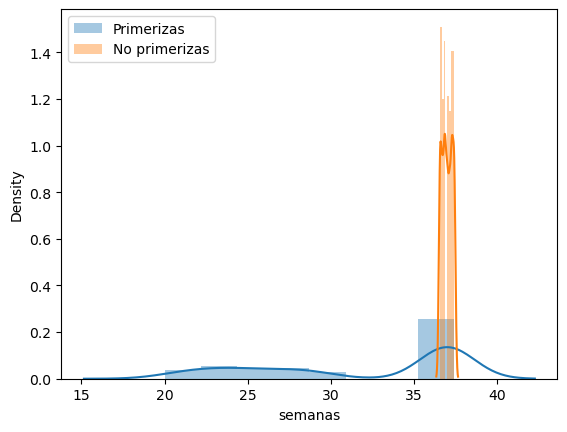

In [187]:
sns.distplot(df_madres_primerizas["semanas"], label="Primerizas")
sns.distplot(df_madres_segundas["semanas"], label="No primerizas")
plt.legend()

### En este gráfico de distribucion se puede ver que las madres primerizas tienen el hijo mas temprano que las madres no primerizas. Las no primerizas tienen una distribucion mas acotada, pero entre valores mas altos que las primerizas (37/38 semanas), pero en general se puede ver que las madres primerizas tienen el hijo mas temprano.

___

# 4) Calcular la media y la mediana de la duración del embarazo.

In [188]:
df_embarazos["semanas"].mean()

34.38634724781668

In [189]:
df_embarazos["semanas"].median()

36.857142857142854

___

### Exploración del Proceso "Sin Memoria"

#### El fenómeno de "sin memoria" en la duración de los embarazos se refiere a que el tiempo restante estimado para el parto no depende del tiempo que ya ha pasado. Este fenómeno es característico de las distribuciones exponenciales y se observa en otros procesos estocásticos-

# 5) Si el tiempo estimado es la semana 37, cuantas muestras por pais superan esa semana. Cuantas estan por debajo de esa semana.

In [190]:
df_embarazos

,Unnamed: 0,mother_id,first_child,country,due_date,actual_birth_date,pregnancy_identified_date,semanas
0,0,0,True,Zimbawe,2022-01-01,2022-07-03,2021-10-16,26.142857
1,1,1,False,Zimbawe,2022-01-02,2022-09-18,2021-07-04,37.000000
2,2,2,False,USA,2022-01-03,2022-09-16,2021-06-14,36.571429
3,3,3,True,USA,2022-01-04,2022-09-23,2021-08-24,37.428571
4,4,4,False,USA,2022-01-05,2022-09-24,2021-06-02,37.428571
...,...,...,...,...,...,...,...,...
1995,1995,1995,False,USA,2027-06-19,2028-03-07,2027-04-24,37.428571
1996,1996,1996,True,USA,2027-06-20,2028-03-07,2027-01-10,37.285714
1997,1997,1997,False,Zimbawe,2027-06-21,2028-03-09,2026-12-07,37.428571
1998,1998,1998,False,USA,2027-06-22,2028-03-07,2026-11-03,37.000000


In [191]:
def supera_la_semana_37(x):
    if x >= 37:
        return True
    else:
        return False

df_embarazos["supera_semana_37"] = df_embarazos["semanas"].apply(supera_la_semana_37)

In [192]:
df_embarazos["supera_semana_37"].value_counts()

supera_semana_37
False    1012
True      771
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

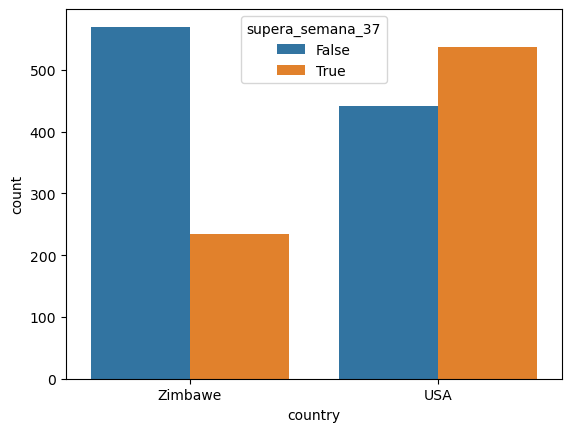

In [193]:
sns.countplot(x="country", hue="supera_semana_37", data=df_embarazos)


___

# 6) ¿Cual seria una buena estimación en caso de que supere la semana 37? ¿Cual seria una buena estimación en caso de que este por debajo de la semana 37?

#### En caso de que supere la semana 37, una buena estimacion seria la media, ya que la distribucion es simetrica y no hay valores atipicos que puedan afectar la media. En caso de que este por debajo de la semana 37, una buena estimacion seria la mediana, ya que la distribucion es asimetrica y hay valores atipicos que pueden afectar la media.

___

# 7) Duración Promedio del Embarazo: Calcula y compara la duración promedio del embarazo para madres primerizas y madres con más hijos.

In [198]:
df_madres_primerizas["semanas"].mean()

31.671134357633214

In [199]:
df_madres_segundas["semanas"].mean()

36.99701398711299